# Linear Regression

Objective: Predict concerete strength output  
Dataset: concrete.csv  
Ref: NA

In [1]:
import matplotlib.pyplot as plot
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('concrete.csv')
print('Dataset size:', data.shape)
data.head()

Dataset size: (1030, 9)


,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,ConcreteStrength
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [2]:
data.describe()

,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,ConcreteStrength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


## Correlation

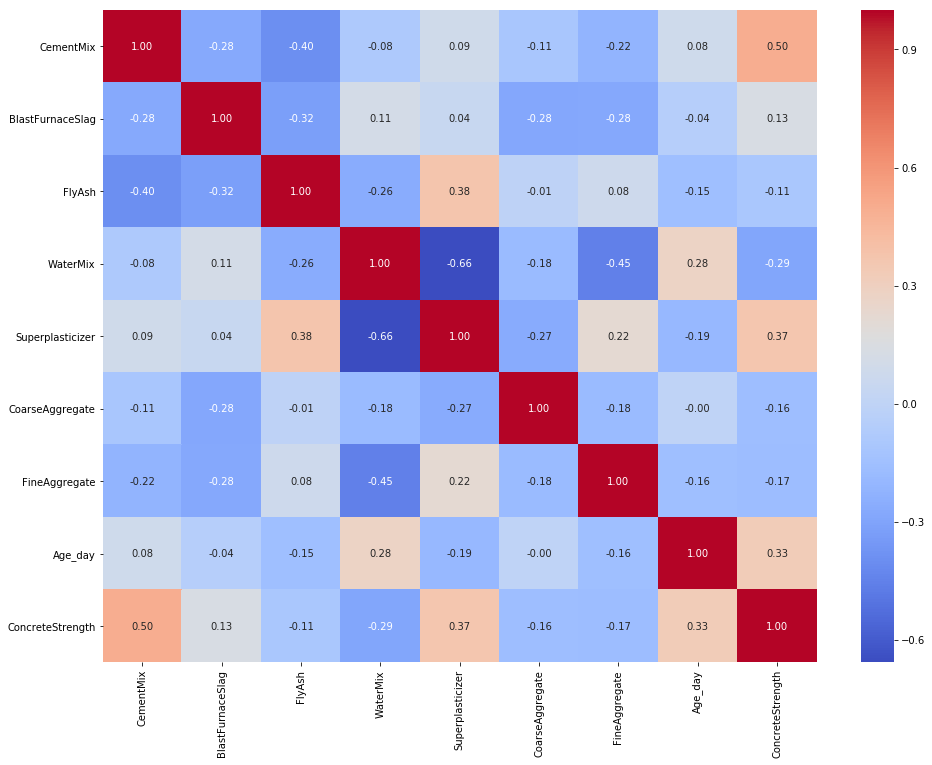

In [3]:
import seaborn as sns
plot.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plot.show()

In [4]:
corr_rank = data.corr()
corr_rank["ConcreteStrength"].sort_values(ascending=False)

ConcreteStrength    1.00
CementMix           0.50
Superplasticizer    0.37
Age_day             0.33
BlastFurnaceSlag    0.13
FlyAsh             -0.11
CoarseAggregate    -0.16
FineAggregate      -0.17
WaterMix           -0.29
Name: ConcreteStrength, dtype: float64

In [5]:
#extract selected column to create new dataframe
datax = data.filter(['CementMix','ConcreteStrength'], axis=1)
datax.head()

,CementMix,ConcreteStrength
0,540.00,79.99
1,540.00,61.89
2,332.50,40.27
3,332.50,41.05
4,198.60,44.30


In [6]:
datax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
CementMix           1030 non-null float64
ConcreteStrength    1030 non-null float64
dtypes: float64(2)
memory usage: 16.2 KB


## Feature and Target

In [7]:
#define feature and target data
x = datax.iloc[:,:-1].values
y = datax.iloc[:,1].values

#split data to 10-test, 2-train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 1/3, random_state=0)

In [8]:
len(x) == len(y)

True

## Linear

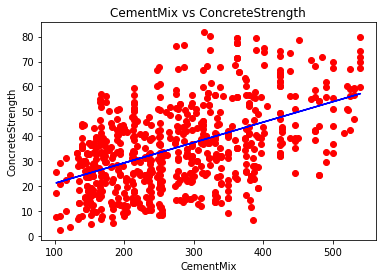

In [9]:
#linear Regression
lr = LinearRegression()
lr.fit(xTrain, yTrain)
yPred = lr.predict(xTest)

#plot chart 
plot.scatter(xTrain, yTrain, color='red')
plot.plot(xTrain, lr.predict(xTrain),color='blue')
plot.title('CementMix vs ConcreteStrength')
plot.xlabel('CementMix')
plot.ylabel('ConcreteStrength')
plot.show()

In [10]:
#print model score, coef and intercept
print('Model score :', round(lr.score(xTrain, yTrain),4))
print('Coef        :', lr.coef_)
print('Intercept   :', round(lr.intercept_,4))

Model score : 0.2547
Coef        : [0.0819]
Intercept   : 12.8642


## Prediction

In [12]:
#prediction using given data
new_rso = 540
predict_sbo = lr.predict([[new_rso]])
predict_sbo

array([57.0853])